In [1]:
import numpy as np
import pandas as pd

In [2]:
fp = open("iris.csv", "r")
next(fp)
iris_data = []
for line in fp:
    record = line.strip().split(",")
    iris_data.append(record)
iris_data[:5]

[['5.1', '3.5', '1.4', '0.2', 'setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'setosa']]

In [3]:
iris_data = pd.read_csv("iris.csv")
iris_data.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


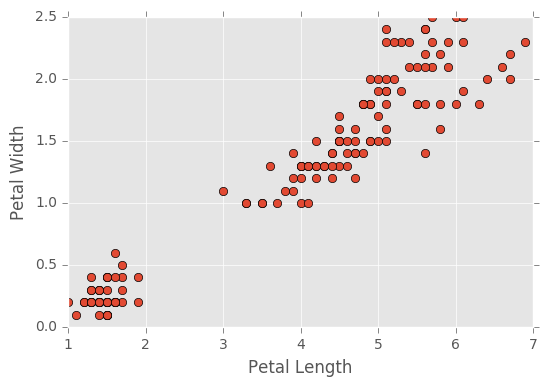

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.plot(iris_data["Petal Length"], iris_data["Petal Width"], "o")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

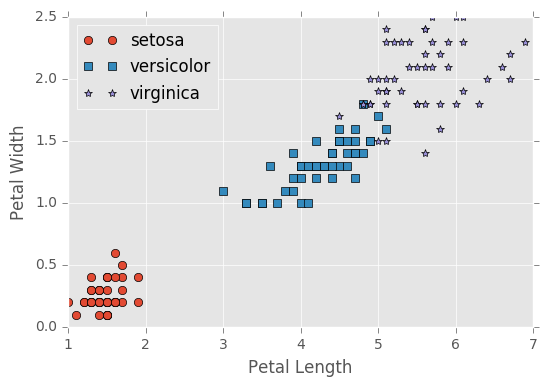

In [5]:
for name, symbol in zip(("setosa", "versicolor", "virginica"), ("o", "s", "*")):
    data = iris_data[iris_data["Species"] == name]
    plt.plot(data["Petal Length"], data["Petal Width"], symbol, label=name)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc=0)

In [6]:
iris_mean = iris_data.mean()
print(iris_mean)

Sepal Length    5.843333
Sepal Width     3.054000
Petal Length    3.758667
Petal Width     1.198667
dtype: float64


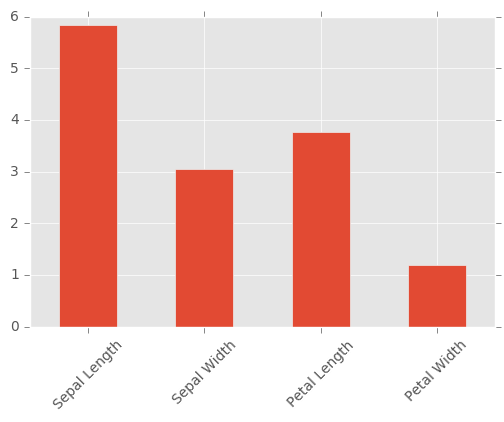

In [7]:
iris_mean.plot(kind="bar", rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03ef493470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f03ef3c2518>], dtype=object)

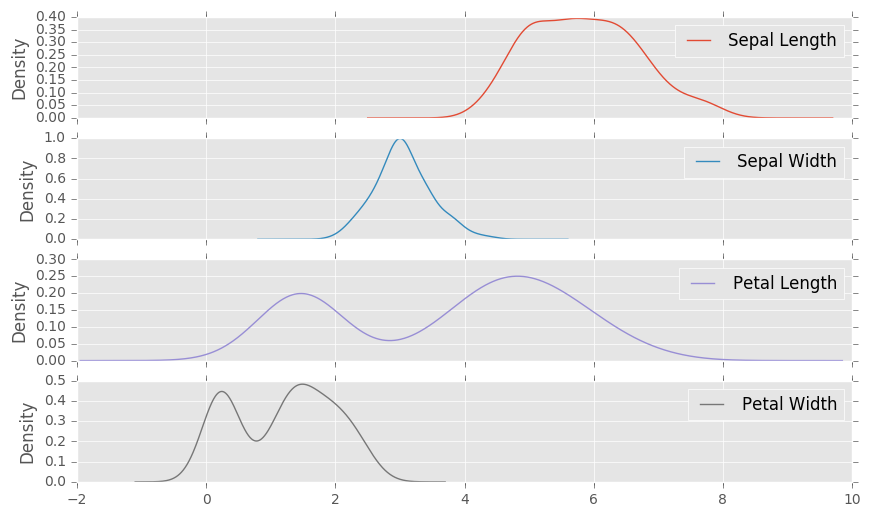

In [8]:
iris_data.plot(kind="kde", subplots=True, figsize=(10, 6))

In [9]:
grouped_data = iris_data.groupby("Species")
group_mean = grouped_data.mean()
group_mean

,Sepal Length,Sepal Width,Petal Length,Petal Width
Species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


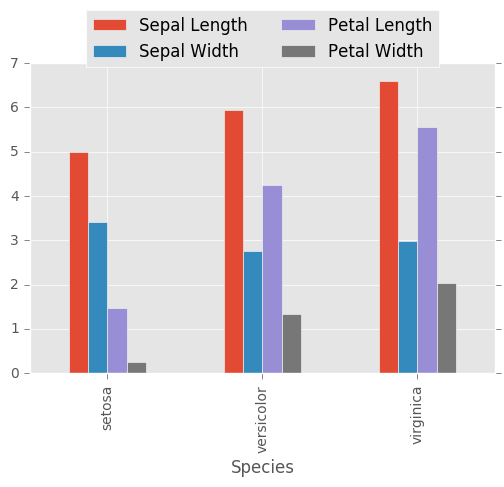

In [10]:
group_mean.plot(kind="bar")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

In [11]:
group_mean.T

Species,setosa,versicolor,virginica
Sepal Length,5.006,5.936,6.588
Sepal Width,3.418,2.770,2.974
Petal Length,1.464,4.260,5.552
Petal Width,0.244,1.326,2.026


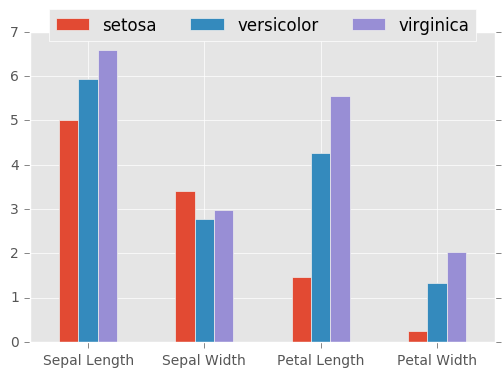

In [12]:
group_mean.T.plot(kind="bar", rot=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

In [13]:
import sqlite3
con = sqlite3.connect("iris.db")

In [14]:
cursor = con.execute("SELECT * FROM iris WHERE Species = 'virginica'")
for row in cursor:
    print(row[0], row[1], row[2], row[3], row[4])

6.3 3.3 6.0 2.5 virginica
5.8 2.7 5.1 1.9 virginica
7.1 3.0 5.9 2.1 virginica
6.3 2.9 5.6 1.8 virginica
6.5 3.0 5.8 2.2 virginica
7.6 3.0 6.6 2.1 virginica
4.9 2.5 4.5 1.7 virginica
7.3 2.9 6.3 1.8 virginica
6.7 2.5 5.8 1.8 virginica
7.2 3.6 6.1 2.5 virginica
6.5 3.2 5.1 2.0 virginica
6.4 2.7 5.3 1.9 virginica
6.8 3.0 5.5 2.1 virginica
5.7 2.5 5.0 2.0 virginica
5.8 2.8 5.1 2.4 virginica
6.4 3.2 5.3 2.3 virginica
6.5 3.0 5.5 1.8 virginica
7.7 3.8 6.7 2.2 virginica
7.7 2.6 6.9 2.3 virginica
6.0 2.2 5.0 1.5 virginica
6.9 3.2 5.7 2.3 virginica
5.6 2.8 4.9 2.0 virginica
7.7 2.8 6.7 2.0 virginica
6.3 2.7 4.9 1.8 virginica
6.7 3.3 5.7 2.1 virginica
7.2 3.2 6.0 1.8 virginica
6.2 2.8 4.8 1.8 virginica
6.1 3.0 4.9 1.8 virginica
6.4 2.8 5.6 2.1 virginica
7.2 3.0 5.8 1.6 virginica
7.4 2.8 6.1 1.9 virginica
7.9 3.8 6.4 2.0 virginica
6.4 2.8 5.6 2.2 virginica
6.3 2.8 5.1 1.5 virginica
6.1 2.6 5.6 1.4 virginica
7.7 3.0 6.1 2.3 virginica
6.3 3.4 5.6 2.4 virginica
6.4 3.1 5.5 1.8 virginica
6.0 3.0 4.8 

In [15]:
import sqlalchemy
engine = sqlalchemy.create_engine("sqlite:///iris.db")

In [16]:
cursor = engine.execute("SELECT * FROM iris WHERE Species = ?", ("virginica", ))
for row in cursor:
    print(row[0], row[1], row[2], row[3], row[4])

6.3 3.3 6.0 2.5 virginica
5.8 2.7 5.1 1.9 virginica
7.1 3.0 5.9 2.1 virginica
6.3 2.9 5.6 1.8 virginica
6.5 3.0 5.8 2.2 virginica
7.6 3.0 6.6 2.1 virginica
4.9 2.5 4.5 1.7 virginica
7.3 2.9 6.3 1.8 virginica
6.7 2.5 5.8 1.8 virginica
7.2 3.6 6.1 2.5 virginica
6.5 3.2 5.1 2.0 virginica
6.4 2.7 5.3 1.9 virginica
6.8 3.0 5.5 2.1 virginica
5.7 2.5 5.0 2.0 virginica
5.8 2.8 5.1 2.4 virginica
6.4 3.2 5.3 2.3 virginica
6.5 3.0 5.5 1.8 virginica
7.7 3.8 6.7 2.2 virginica
7.7 2.6 6.9 2.3 virginica
6.0 2.2 5.0 1.5 virginica
6.9 3.2 5.7 2.3 virginica
5.6 2.8 4.9 2.0 virginica
7.7 2.8 6.7 2.0 virginica
6.3 2.7 4.9 1.8 virginica
6.7 3.3 5.7 2.1 virginica
7.2 3.2 6.0 1.8 virginica
6.2 2.8 4.8 1.8 virginica
6.1 3.0 4.9 1.8 virginica
6.4 2.8 5.6 2.1 virginica
7.2 3.0 5.8 1.6 virginica
7.4 2.8 6.1 1.9 virginica
7.9 3.8 6.4 2.0 virginica
6.4 2.8 5.6 2.2 virginica
6.3 2.8 5.1 1.5 virginica
6.1 2.6 5.6 1.4 virginica
7.7 3.0 6.1 2.3 virginica
6.3 3.4 5.6 2.4 virginica
6.4 3.1 5.5 1.8 virginica
6.0 3.0 4.8 

In [17]:
engine = sqlalchemy.create_engine("sqlite:///iris.db")
iris_data = pd.read_sql("SELECT * FROM iris", engine)
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [18]:
sql = """SELECT * FROM iris WHERE Species = '{0}' AND "Petal Width" >= {1}""".format("versicolor", 1.5)
versicolor = pd.read_sql(sql, engine)
versicolor

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.9,3.1,4.9,1.5,versicolor
2,6.5,2.8,4.6,1.5,versicolor
3,6.3,3.3,4.7,1.6,versicolor
4,5.9,3.0,4.2,1.5,versicolor
5,5.6,3.0,4.5,1.5,versicolor
6,6.2,2.2,4.5,1.5,versicolor
7,5.9,3.2,4.8,1.8,versicolor
8,6.3,2.5,4.9,1.5,versicolor
9,6.7,3.0,5.0,1.7,versicolor
